In [1]:
!pip install xgboost

In [2]:
import warnings            
warnings.filterwarnings("ignore") 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

In [3]:
ufc = pd.read_csv('ufc_dataset.csv')
df = ufc.copy()
df.head(3)

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4111 non-null   object 
 1   nickname                                      2257 non-null   object 
 2   wins                                          4111 non-null   int64  
 3   losses                                        4111 non-null   int64  
 4   draws                                         4111 non-null   int64  
 5   height_cm                                     3813 non-null   float64
 6   weight_in_kg                                  4024 non-null   float64
 7   reach_in_cm                                   2184 non-null   float64
 8   stance                                        3288 non-null   object 
 9   date_of_birth                                 2976 non-null   o

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wins,4111.0,12.366821,9.374667,0.00,7.00,11.00,17.00,253.00
losses,4111.0,5.726344,5.103768,0.00,2.00,5.00,8.00,83.00
draws,4111.0,0.264413,0.822373,0.00,0.00,0.00,0.00,11.00
height_cm,3813.0,178.234325,8.888050,152.40,172.72,177.80,185.42,226.06
weight_in_kg,4024.0,77.395825,17.982242,47.63,65.77,77.11,83.91,349.27
reach_in_cm,2184.0,181.808874,10.680804,147.32,175.26,182.88,190.50,213.36
significant_strikes_landed_per_minute,4111.0,2.437516,1.990903,0.00,0.83,2.33,3.60,17.65
significant_striking_accuracy,4111.0,35.542447,20.398502,0.00,27.00,40.00,49.00,100.00
significant_strikes_absorbed_per_minute,4111.0,3.145206,2.848502,0.00,1.55,2.94,4.23,52.50
significant_strike_defence,4111.0,42.643639,22.322427,0.00,36.00,50.00,58.00,100.00


Missing Data Analysis

In [7]:
df.isnull().any()

name                                            False
nickname                                         True
wins                                            False
losses                                          False
draws                                           False
height_cm                                        True
weight_in_kg                                     True
reach_in_cm                                      True
stance                                           True
date_of_birth                                    True
significant_strikes_landed_per_minute           False
significant_striking_accuracy                   False
significant_strikes_absorbed_per_minute         False
significant_strike_defence                      False
average_takedowns_landed_per_15_minutes         False
takedown_accuracy                               False
takedown_defense                                False
average_submissions_attempted_per_15_minutes    False
dtype: bool

In [8]:
from datetime import datetime

df.rename(columns={'date_of_birth': 'age'}, inplace=True)
df['age'] = pd.to_datetime(df['age'])


def calculate_age(birth_date):
    if pd.isnull(birth_date):
        return None
    today = datetime.today()
    return today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))

df['age'] = df['age'].apply(calculate_age)

df['age'].fillna(32, inplace=True) #avg ufc fighter age

numeric_cols = df.select_dtypes(include=[np.number])

df[numeric_cols.columns] = numeric_cols.apply(lambda x: x.fillna(x.mean()), axis=0)


stance_freq_most = df["stance"].mode()[0]
stance_freq_most

df['stance'] = df['stance'].apply(lambda x: "Orthodox" if x == "NaN" or pd.isna(x) else x)

df

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,age,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,181.808874,Orthodox,42.0,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,181.808874,Orthodox,32.0,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,181.808874,Orthodox,32.0,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,181.808874,Orthodox,32.0,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.040000,Orthodox,29.0,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,John Campetella,NaN,0,1,0,175.26,106.59,181.808874,Orthodox,32.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4107,Andre Pederneiras,NaN,1,1,2,172.72,70.31,181.808874,Orthodox,57.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4108,Bryson Kamaka,NaN,12,20,1,180.34,77.11,181.808874,Orthodox,32.0,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0
4109,Matej Penaz,Money,6,1,0,190.50,83.91,210.820000,Southpaw,27.0,1.28,33.0,2.55,33.0,0.00,0.0,0.0,0.0


Outlier Analysis

In [10]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
clf.fit_predict(df[numeric_cols.columns])

df_scores = clf.negative_outlier_factor_
df_scores[0:10]

array([-1.6948693 , -1.75180472, -1.32767638, -1.30043835, -1.04977773,
       -1.04430733, -1.32705775, -1.44629512, -1.18364488, -1.84554292])

In [11]:
np.sort(df_scores)[0:20]

array([-5.72739366, -5.47642815, -5.41287815, -5.08882808, -4.41469199,
       -4.12606127, -3.9048508 , -3.59321674, -3.58024003, -3.12306475,
       -2.83991495, -2.83875663, -2.77470427, -2.71073462, -2.64232381,
       -2.57852152, -2.56108074, -2.54717778, -2.51992179, -2.50905377])

In [12]:
threshold = np.sort(df_scores)[9]
anomalous_tf = df_scores > threshold
anomalous_tf[0:50]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [13]:
new_df = df[df_scores > threshold]
new_df

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,age,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,181.808874,Orthodox,42.0,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,181.808874,Orthodox,32.0,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,181.808874,Orthodox,32.0,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,181.808874,Orthodox,32.0,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.040000,Orthodox,29.0,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,John Campetella,NaN,0,1,0,175.26,106.59,181.808874,Orthodox,32.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4107,Andre Pederneiras,NaN,1,1,2,172.72,70.31,181.808874,Orthodox,57.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4108,Bryson Kamaka,NaN,12,20,1,180.34,77.11,181.808874,Orthodox,32.0,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0
4109,Matej Penaz,Money,6,1,0,190.50,83.91,210.820000,Southpaw,27.0,1.28,33.0,2.55,33.0,0.00,0.0,0.0,0.0


In [14]:
new_df[df.duplicated()]

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,age,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes


In [15]:

result_columns = ['name','wins','losses','draws', 'height_cm', 'weight_in_kg', 'age']

result = new_df[result_columns]
result[0:10]


,name,wins,losses,draws,height_cm,weight_in_kg,age
0,Robert Drysdale,7,0,0,190.50,92.99,42.0
1,Daniel McWilliams,15,37,0,185.42,83.91,32.0
2,Dan Molina,13,9,0,177.80,97.98,32.0
3,Paul Ruiz,7,4,0,167.64,61.23,32.0
4,Collin Huckbody,8,2,0,190.50,83.91,29.0
5,Gerald Strebendt,9,7,0,175.26,70.31,45.0
6,Isaiah Hill,5,7,1,177.80,70.31,32.0
7,Kenneth Seegrist,4,7,0,182.88,83.91,32.0
8,Will Kerr,9,3,0,177.80,70.31,41.0
9,Neil Grove,12,8,1,198.12,120.20,53.0


In [16]:
most_wins = result.loc[result['wins'].idxmax(), 'name']
most_loses = result.loc[result['losses'].idxmax(), 'name']

print(f"{most_wins} has the most wins!")
print(f"{most_loses} has the most loses!")

Jeremy Horn has the most wins!
Shannon Ritch has the most loses!


In [17]:
top_seven = result.sort_values(by = "wins", ascending = False).head(7)
top_seven

,name,wins,losses,draws,height_cm,weight_in_kg,age
675,Jeremy Horn,91,22,5,185.42,83.91,48.0
599,Travis Wiuff,75,21,0,190.50,92.99,46.0
3740,Luis Santos,63,10,1,185.42,77.11,32.0
1085,Jeff Monson,60,26,1,175.26,112.04,53.0
1269,Yuki Kondo,60,33,9,180.34,83.01,49.0
361,Aleksei Oleinik,60,17,1,187.96,108.86,47.0
349,Ikuhisa Minowa,60,42,8,175.26,82.10,48.0


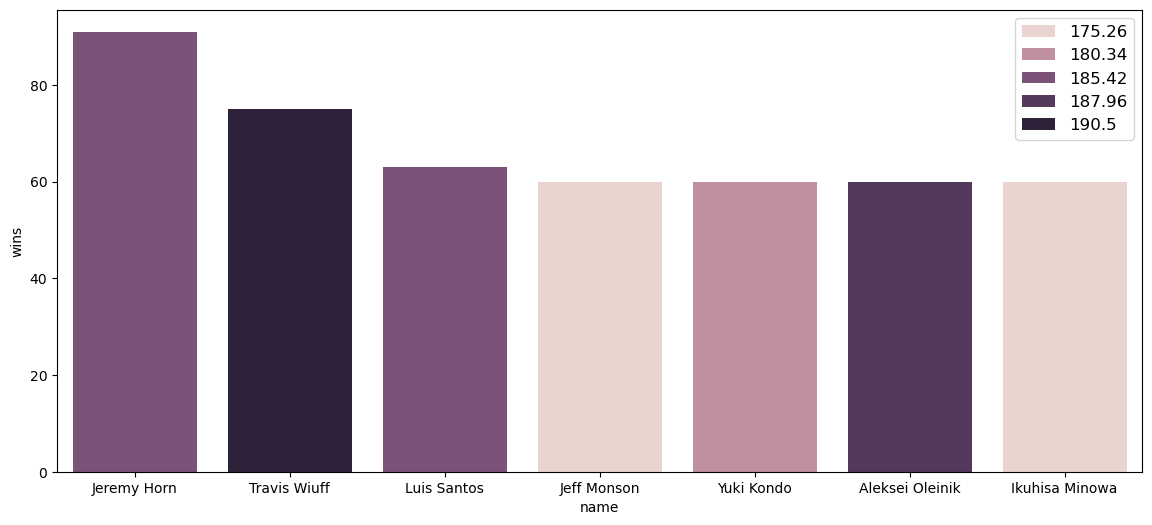

In [18]:
plt.figure(figsize=(14, 6))
sns.barplot(x = "name", y = 'wins', hue = "height_cm", data = top_seven);
plt.legend(fontsize=12) 

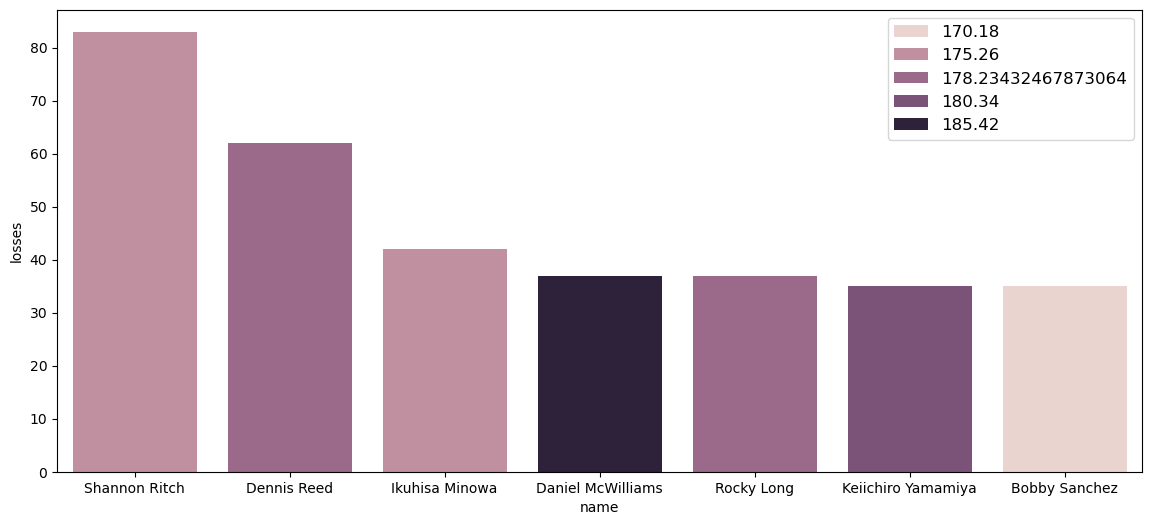

In [19]:
bottom_seven = result.sort_values(by = "losses", ascending = False).head(7)

plt.figure(figsize=(14, 6))
sns.barplot(x = "name", y = 'losses', hue = "height_cm", data = bottom_seven);
plt.legend(fontsize=12) 


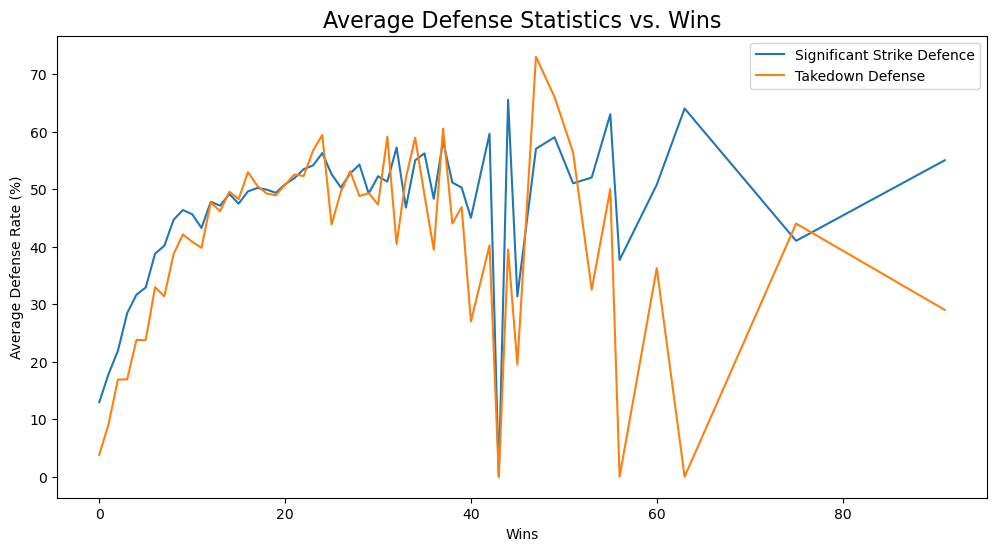

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(new_df.groupby('wins')['significant_strike_defence'].mean(), label='Significant Strike Defence')
plt.plot(new_df.groupby('wins')['takedown_defense'].mean(), label='Takedown Defense')
plt.title('Average Defense Statistics vs. Wins', fontsize = 16)
plt.xlabel('Wins')
plt.ylabel('Average Defense Rate (%)')
plt.legend()

plt.show()

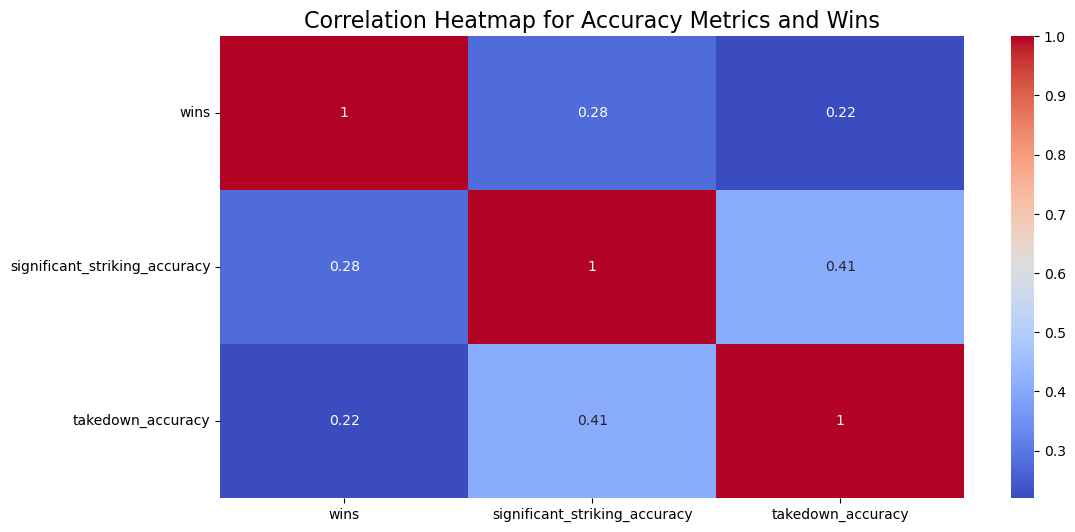

In [21]:
correlation_metrics = new_df[['wins', 'significant_striking_accuracy', 'takedown_accuracy']].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_metrics, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Accuracy Metrics and Wins', fontsize = 16)
plt.show()

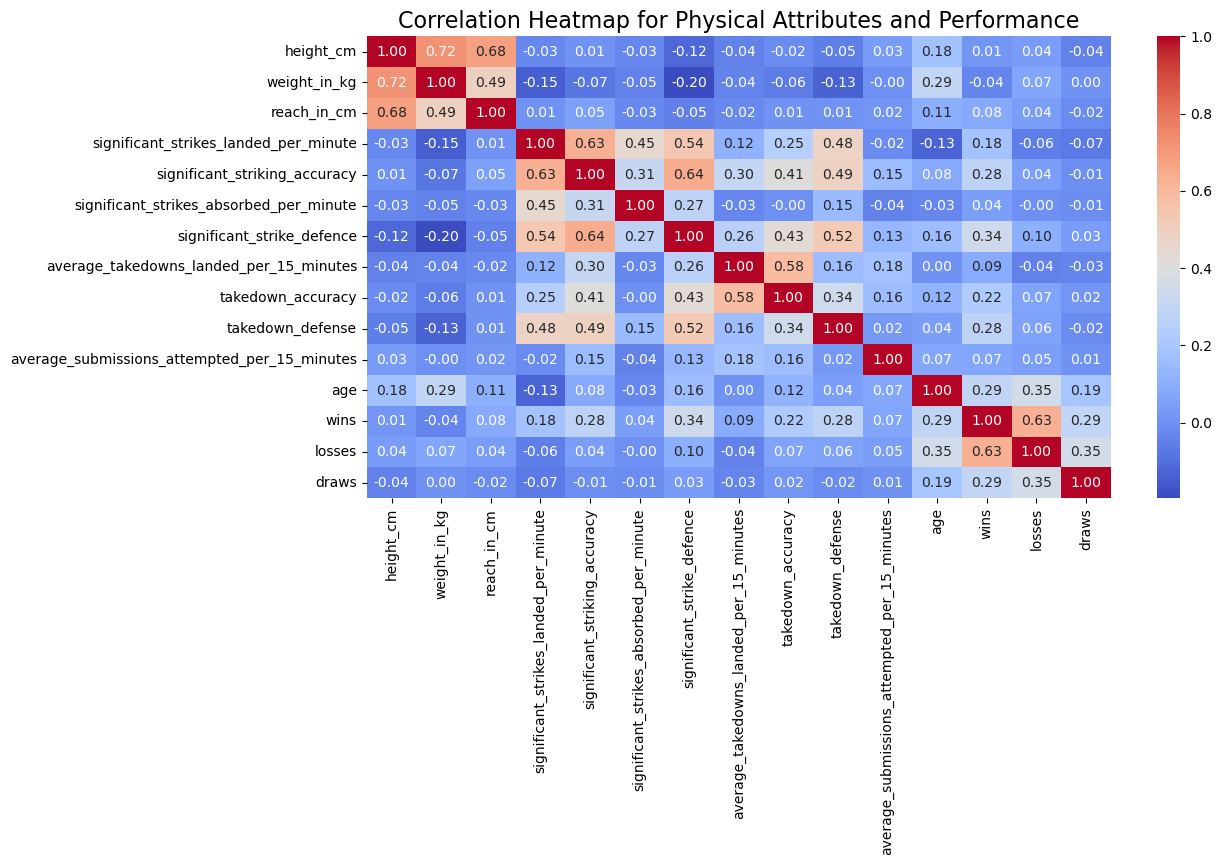

In [22]:
physical_attributes = ['height_cm', 'weight_in_kg', 'reach_in_cm', 'significant_strikes_landed_per_minute', 'significant_striking_accuracy',
                       'significant_strikes_absorbed_per_minute', 'significant_strike_defence', 'average_takedowns_landed_per_15_minutes',
                       'takedown_accuracy', 'takedown_defense', 'average_submissions_attempted_per_15_minutes', 'age']
performance_metrics = ['wins', 'losses', 'draws']

correlation_matrix = new_df[physical_attributes + performance_metrics].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Physical Attributes and Performance', fontsize = 16)
plt.show()

In [23]:
new_df.select_dtypes(include=[np.number]).corr().sort_values(by = "wins", ascending = False).head(10)

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,age,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
wins,1.000000,0.628030,0.293234,0.014184,-0.036314,0.081141,0.285781,0.179163,0.275570,0.044875,0.339299,0.085442,0.219895,0.275648,0.065594
losses,0.628030,1.000000,0.353001,0.035281,0.068385,0.040398,0.352422,-0.055264,0.044959,-0.003287,0.102123,-0.042503,0.065103,0.059673,0.045039
significant_strike_defence,0.339299,0.102123,0.033405,-0.117008,-0.196145,-0.047375,0.156244,0.540613,0.641361,0.272298,1.000000,0.261017,0.429401,0.524074,0.131459
draws,0.293234,0.353001,1.000000,-0.042229,0.000186,-0.017353,0.193319,-0.069070,-0.006272,-0.012398,0.033405,-0.032918,0.017714,-0.015769,0.006410
age,0.285781,0.352422,0.193319,0.177530,0.290590,0.105921,1.000000,-0.127334,0.083260,-0.028549,0.156244,0.002929,0.118077,0.044518,0.072300
takedown_defense,0.275648,0.059673,-0.015769,-0.053153,-0.131643,0.008762,0.044518,0.478620,0.486650,0.148796,0.524074,0.158219,0.344270,1.000000,0.023947
significant_striking_accuracy,0.275570,0.044959,-0.006272,0.008963,-0.074662,0.048555,0.083260,0.626534,1.000000,0.306595,0.641361,0.302403,0.407365,0.486650,0.152973
takedown_accuracy,0.219895,0.065103,0.017714,-0.015958,-0.061398,0.006821,0.118077,0.247093,0.407365,-0.000730,0.429401,0.584912,1.000000,0.344270,0.155137
significant_strikes_landed_per_minute,0.179163,-0.055264,-0.069070,-0.026815,-0.148971,0.005619,-0.127334,1.000000,0.626534,0.446465,0.540613,0.115314,0.247093,0.478620,-0.016726
average_takedowns_landed_per_15_minutes,0.085442,-0.042503,-0.032918,-0.043016,-0.040437,-0.020301,0.002929,0.115314,0.302403,-0.028388,0.261017,1.000000,0.584912,0.158219,0.180099


MODEL test-train split

In [25]:
y = new_df["wins"]
X = new_df[["significant_strike_defence", "takedown_defense", "significant_striking_accuracy", "takedown_accuracy",
        "significant_strikes_landed_per_minute", "average_takedowns_landed_per_15_minutes", "reach_in_cm", "age"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =42)

KNN Model

In [27]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

print("naive test error:", np.sqrt(mean_squared_error(y_test, knn_model.predict(X_test))))

naive test error: 8.20020681524957


KNN Model Tuning

In [29]:
from sklearn.model_selection import GridSearchCV

knn_params = {'n_neighbors': np.arange(1, 30, 1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, y_train)
knn_cv_model.best_params_['n_neighbors']

29

In [30]:
knn_tuned = KNeighborsRegressor(n_neighbors = 29)
knn_tuned.fit(X_train, y_train)
print("tuned test error: ",np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test))))

tuned test error:  7.456157575261714


KNN Prediction

In [32]:
knn_tuned.predict([[60.0, 70.0, 33.0, 70.0, 2.24, 2.0, 181.808874, 32]])

array([15.65517241])

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)

rf_model.predict(X_test)[0:10]
print("naive test error: ", np.sqrt(mean_squared_error(y_test, rf_model.predict(X_test))))

naive test error:  7.573265755813601


Random Forests Model Tuning

In [35]:
rf_params = {   'max_depth': list(range(1, 10)),
    'max_features': [3, 5, 10],
    'n_estimators': [100, 200, 500]}

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

rf_cv_model.fit(X_train, y_train)

print(rf_cv_model.best_params_)


{'max_depth': 7, 'max_features': 3, 'n_estimators': 100}


In [36]:
rf_tuned = RandomForestRegressor(max_depth  = 7, 
                                 max_features = 3, 
                                 n_estimators =200)

rf_tuned.fit(X_train, y_train)
print("Tuned test error: ", np.sqrt(mean_squared_error(y_test, rf_tuned.predict(X_test))))

Tuned test error:  7.446081362710137


Random Forests Prediction

In [38]:
rf_tuned.predict([[60.0, 70.0, 33.0, 70.0, 2.24, 2.0, 181.808874, 32]])

array([12.30290574])

XGBOOST Model

In [40]:
import xgboost as xgb
from xgboost import XGBRegressor

DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

xgb_model = XGBRegressor().fit(X_train, y_train)

print("naive test error: ", np.sqrt(mean_squared_error(y_test, xgb_model.predict(X_test))))

naive test error:  8.034460368082566


XGBOOST Model Tuning

In [98]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}

xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 1
                      )


xgb_cv.fit(X_train, y_train)

for i, (key, value) in enumerate(xgb_cv.best_params_.items()):
        print(f"{key}: {value}")
    

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
colsample_bytree: 0.9
learning_rate: 0.01
max_depth: 3
n_estimators: 500


In [100]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.9, 
                         learning_rate = 0.01, 
                         max_depth = 3, 
                         n_estimators = 500) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

print("Tuned test error: ", np.sqrt(mean_squared_error(y_test, xgb_tuned.predict(X_test))))

Tuned test error:  7.418006405342169


XGB Prediction

In [103]:
xgb_tuned.predict([[60.0, 70.0, 33.0, 70.0, 2.24, 2.0, 181.808874, 32]])[0]

12.572764